In [1]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

<center><h1 style="font-family: 'Times New Roman';">THE WEATHER ON MARS</h1></center>
<center><h2 style="font-family: 'Times New Roman';">prepared by Miroslava Malkovska</h3></center>

### Introduction
This analysis explores the weather data from Mars, focusing on temperature fluctuations and atmospheric pressure. Through the examination of various statistical measures including mean, median, variance, and standard deviation, the study provides insights into the stability of Martian temperatures and the variability in pressure. These findings are crucial for understanding the Martian environment, which has implications for future missions and potential human settlement.

### 1. Mars weather data overview

#### Used sources:

[https://github.com/the-pudding/data/blob/master/mars-weather/mars-weather.csv](https://github.com/the-pudding/data/blob/master/mars-weather/mars-weather.csv)

[https://www.kaggle.com/datasets/imkrkannan/mars-weather-data?select=mars-weather.csv](https://www.kaggle.com/datasets/imkrkannan/mars-weather-data?select=mars-weather.csv)

[https://www.kaggle.com/datasets/markmbaum/mars-surface-images](https://www.kaggle.com/datasets/markmbaum/mars-surface-images)


### Data dictionary for Mars weather dataset

- **id**: A unique identifier for each row in the dataset.
- **terrestrial_date**: The Earth date corresponding to the data collected on Mars.
- **sol**: The Martian solar day (Sol) number on which the data was collected.
- **ls**: The solar longitude, indicating Mars' position in its orbit around the Sun. It ranges from 0 to 360 degrees.
- **month**: The Martian Month. Similarly to Earth, Martian time can be divided into 12 months. Helpful information can be found [here](https://www-mars.lmd.jussieu.fr/mars/time/solar_longitude.html).
- **min_temp**: The minimum temperature recorded on that Sol in degrees Celsius.
- **max_temp**: The maximum temperature recorded on that Sol in degrees Celsius.
- **pressure**: The atmospheric pressure recorded on that Sol in Pascals.
- **wind_speed**: The average wind speed (m/s) measured in a single sol. Note: Wind Speed data has not be transmitted to Earth since Sol 1485. Missing values are coded as NaN.
- **atmo_opacity**: A measure of the opacity of the Martian atmosphere, indicating how much dust is present.

### 2. Cleaning and tidying of the data to prepare for further investigation

In [761]:
mars_weather_kaggle = pd.read_csv("mars-weather.csv")

In [763]:
mars_weather_kaggle

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [765]:
mars_weather_git = pd.read_csv("mars-weathergithub.csv")

In [767]:
mars_weather_git

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [769]:
mars_weather_kaggle.equals(mars_weather_git)

True

In [771]:
# Comparison between the both tables from different sources

comparison = mars_weather_kaggle == mars_weather_git

In [773]:
comparison.value_counts()

id    terrestrial_date  sol   ls    month  min_temp  max_temp  pressure  wind_speed  atmo_opacity
True  True              True  True  True   True      True      True      False       True            1867
                                           False     False     False     False       True              27
Name: count, dtype: int64

In [775]:
# Differences in the "pressure" column

differences = mars_weather_kaggle["pressure"] != mars_weather_git["pressure"]

In [777]:
# Extract the differing values for "pressure" from both DataFrames

different_values_kaggle = mars_weather_kaggle["pressure"][differences]
different_values_git = mars_weather_git["pressure"][differences]

In [779]:
# Combine the differing values into one DataFrame for comparison

comparison = pd.DataFrame({
    "Kaggle_pressure": different_values_kaggle,
    "Git_pressure": different_values_git
})

In [781]:
comparison

,Kaggle_pressure,Git_pressure
363,NaN,NaN
364,NaN,NaN
365,NaN,NaN
1005,NaN,NaN
1021,NaN,NaN
1079,NaN,NaN
1467,NaN,NaN
1468,NaN,NaN
1484,NaN,NaN
1485,NaN,NaN


In [783]:
mars_weather_kaggle["wind_speed"] == mars_weather_git["wind_speed"]

0       False
1       False
2       False
3       False
4       False
        ...  
1889    False
1890    False
1891    False
1892    False
1893    False
Name: wind_speed, Length: 1894, dtype: bool

In [785]:
mars_weather_kaggle["wind_speed"].unique()

array([nan])

In [787]:
mars_weather_git["wind_speed"].unique()

array([nan])

In [789]:
# Clean only when the whole column has value "nan"

mars_weather_kaggle_cleaned = mars_weather_kaggle.dropna(axis=1, how="all")

In [791]:
mars_weather_kaggle_cleaned

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Sunny
...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,Sunny


In [793]:
mars_weather_kaggle.dtypes.value_counts()

float64    4
int64      3
object     3
Name: count, dtype: int64

In [795]:
mars_weather_kaggle_cleaned.dtypes.value_counts()

int64      3
object     3
float64    3
Name: count, dtype: int64

In [797]:
mars_weather_kaggle.shape

(1894, 10)

In [799]:
mars_weather_kaggle_cleaned.shape

(1894, 9)

In [801]:
mars_weather_kaggle

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [803]:
mars_weather_git_cleaned = mars_weather_git.dropna(axis=1, how="all")

In [805]:
mars_weather_git_cleaned

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Sunny
...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,Sunny


In [807]:
mars_weather_git

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [809]:
comparison_cleaned = mars_weather_kaggle_cleaned == mars_weather_git_cleaned

In [811]:
comparison_cleaned.value_counts()

id    terrestrial_date  sol   ls    month  min_temp  max_temp  pressure  atmo_opacity
True  True              True  True  True   True      True      True      True            1867
                                           False     False     False     True              27
Name: count, dtype: int64

In [737]:
mars_weather_git_cleaned.month

0       Month 5
1       Month 5
2       Month 5
3       Month 5
4       Month 5
         ...   
1889    Month 6
1890    Month 6
1891    Month 6
1892    Month 6
1893    Month 6
Name: month, Length: 1894, dtype: object

In [813]:
mars_weather_git_cleaned[["month", "month_number"]] = mars_weather_git_cleaned.month.str.split(expand=True)

/var/folders/nr/w2b2xpqj79q40hh6j8sw7glw0000gn/T/ipykernel_96185/807995832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_weather_git_cleaned[["month", "month_number"]] = mars_weather_git_cleaned.month.str.split(expand=True)


In [815]:
mars_weather_git_cleaned

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity,month_number
0,1895,2018-02-27,1977,135,Month,-77.0,-10.0,727.0,Sunny,5
1,1893,2018-02-26,1976,135,Month,-77.0,-10.0,728.0,Sunny,5
2,1894,2018-02-25,1975,134,Month,-76.0,-16.0,729.0,Sunny,5
3,1892,2018-02-24,1974,134,Month,-77.0,-13.0,729.0,Sunny,5
4,1889,2018-02-23,1973,133,Month,-78.0,-18.0,730.0,Sunny,5
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month,-76.0,-18.0,741.0,Sunny,6
1890,13,2012-08-17,11,156,Month,-76.0,-11.0,740.0,Sunny,6
1891,2,2012-08-16,10,155,Month,-75.0,-16.0,739.0,Sunny,6
1892,232,2012-08-15,9,155,Month,NaN,NaN,NaN,Sunny,6


In [817]:
mars_weather_git_cleaned["month_number"] = pd.to_numeric(mars_weather_git_cleaned["month_number"])

In [819]:
mars_weather_git_cleaned["month_number"].value_counts()

month_number
4     194
3     194
2     182
1     176
12    166
6     153
5     149
11    145
7     142
8     141
9     136
10    116
Name: count, dtype: int64

In [821]:
mars_weather_git_cleaned = mars_weather_git_cleaned.drop(columns = "month")

In [823]:
mars_weather_git_cleaned

,id,terrestrial_date,sol,ls,min_temp,max_temp,pressure,atmo_opacity,month_number
0,1895,2018-02-27,1977,135,-77.0,-10.0,727.0,Sunny,5
1,1893,2018-02-26,1976,135,-77.0,-10.0,728.0,Sunny,5
2,1894,2018-02-25,1975,134,-76.0,-16.0,729.0,Sunny,5
3,1892,2018-02-24,1974,134,-77.0,-13.0,729.0,Sunny,5
4,1889,2018-02-23,1973,133,-78.0,-18.0,730.0,Sunny,5
...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,-76.0,-18.0,741.0,Sunny,6
1890,13,2012-08-17,11,156,-76.0,-11.0,740.0,Sunny,6
1891,2,2012-08-16,10,155,-75.0,-16.0,739.0,Sunny,6
1892,232,2012-08-15,9,155,NaN,NaN,NaN,Sunny,6


In [825]:
mars_weather_git_cleaned["terrestrial_date"] = pd.to_datetime(mars_weather_git_cleaned["terrestrial_date"]).dt.strftime('%d.%m.%Y')

In [827]:
mars_weather_git_cleaned["terrestrial_date"]

0       27.02.2018
1       26.02.2018
2       25.02.2018
3       24.02.2018
4       23.02.2018
           ...    
1889    18.08.2012
1890    17.08.2012
1891    16.08.2012
1892    15.08.2012
1893    07.08.2012
Name: terrestrial_date, Length: 1894, dtype: object

In [829]:
mars_weather_git_cleaned

,id,terrestrial_date,sol,ls,min_temp,max_temp,pressure,atmo_opacity,month_number
0,1895,27.02.2018,1977,135,-77.0,-10.0,727.0,Sunny,5
1,1893,26.02.2018,1976,135,-77.0,-10.0,728.0,Sunny,5
2,1894,25.02.2018,1975,134,-76.0,-16.0,729.0,Sunny,5
3,1892,24.02.2018,1974,134,-77.0,-13.0,729.0,Sunny,5
4,1889,23.02.2018,1973,133,-78.0,-18.0,730.0,Sunny,5
...,...,...,...,...,...,...,...,...,...
1889,24,18.08.2012,12,156,-76.0,-18.0,741.0,Sunny,6
1890,13,17.08.2012,11,156,-76.0,-11.0,740.0,Sunny,6
1891,2,16.08.2012,10,155,-75.0,-16.0,739.0,Sunny,6
1892,232,15.08.2012,9,155,NaN,NaN,NaN,Sunny,6


In [831]:
mars_weather_git_cleaned = mars_weather_git_cleaned.dropna(subset=["min_temp", "max_temp", "pressure"])

In [833]:
mars_weather_git_cleaned.min_temp.value_counts()

min_temp
-77.0    138
-76.0    133
-79.0    129
-80.0    118
-71.0    117
-78.0    114
-74.0    112
-75.0    111
-73.0    111
-72.0    102
-70.0     79
-85.0     71
-81.0     67
-84.0     63
-69.0     59
-82.0     57
-86.0     49
-68.0     49
-67.0     34
-65.0     32
-66.0     31
-83.0     30
-87.0     30
-88.0     15
-64.0      9
-63.0      3
-89.0      2
-62.0      1
-90.0      1
Name: count, dtype: int64

In [835]:
mars_weather_kaggle_cleaned = mars_weather_kaggle_cleaned.dropna(subset=["min_temp", "max_temp", "pressure"])

In [837]:
mars_weather_kaggle_cleaned.min_temp.value_counts()

min_temp
-77.0    138
-76.0    133
-79.0    129
-80.0    118
-71.0    117
-78.0    114
-74.0    112
-75.0    111
-73.0    111
-72.0    102
-70.0     79
-85.0     71
-81.0     67
-84.0     63
-69.0     59
-82.0     57
-86.0     49
-68.0     49
-67.0     34
-65.0     32
-66.0     31
-83.0     30
-87.0     30
-88.0     15
-64.0      9
-63.0      3
-89.0      2
-62.0      1
-90.0      1
Name: count, dtype: int64

In [839]:
# Check whether the column is identical in the both tables

(mars_weather_kaggle_cleaned["min_temp"] == mars_weather_git_cleaned["min_temp"]).value_counts()

min_temp
True    1867
Name: count, dtype: int64

In [841]:
(mars_weather_kaggle_cleaned["max_temp"] == mars_weather_git_cleaned["max_temp"]).value_counts()

max_temp
True    1867
Name: count, dtype: int64

In [843]:
(mars_weather_kaggle_cleaned["pressure"] == mars_weather_git_cleaned["pressure"]).value_counts()

pressure
True    1867
Name: count, dtype: int64

### 3. Analysis and visualization. 
#### This section presents the statistical analysis of the data and visualize them. 

#### Summary statistics<br>

In [548]:
# The minimum value of minimal temperature

mars_weather_git_cleaned["min_temp"].min()

-90.0

In [550]:
# The maximum value of maximal temperature

mars_weather_git_cleaned["max_temp"].max()

11.0

In [847]:
# Numeric columns for analysis

numeric_columns = ["min_temp", "max_temp", "pressure"]

In [849]:
# Summary statistics

summary_statistics = mars_weather_git_cleaned[numeric_columns].agg(["mean", "median", "var", "std", "min", "max"])

In [851]:
# Transpose the DataFrame for better readability

summary_statistics_transposed = summary_statistics.T

In [853]:
summary_statistics_transposed

,mean,median,var,std,min,max
min_temp,-76.121050,-76.0,30.295093,5.504098,-90.0,-62.0
max_temp,-12.510445,-11.0,114.478321,10.699454,-35.0,11.0
pressure,841.066417,853.0,2943.412521,54.253226,727.0,925.0


* Mean gives the average value
* Median gives the middle value
* Variance (var) measures how spread out the data is
* Standard Deviation (std) provides a measure of the spread of data around the mean
* The minimum value is the smallest value 
* The maximum value is the largest value 

In [855]:
# List of statistics to plot

stats = ["mean", "median", "var", "std", "min", "max"]

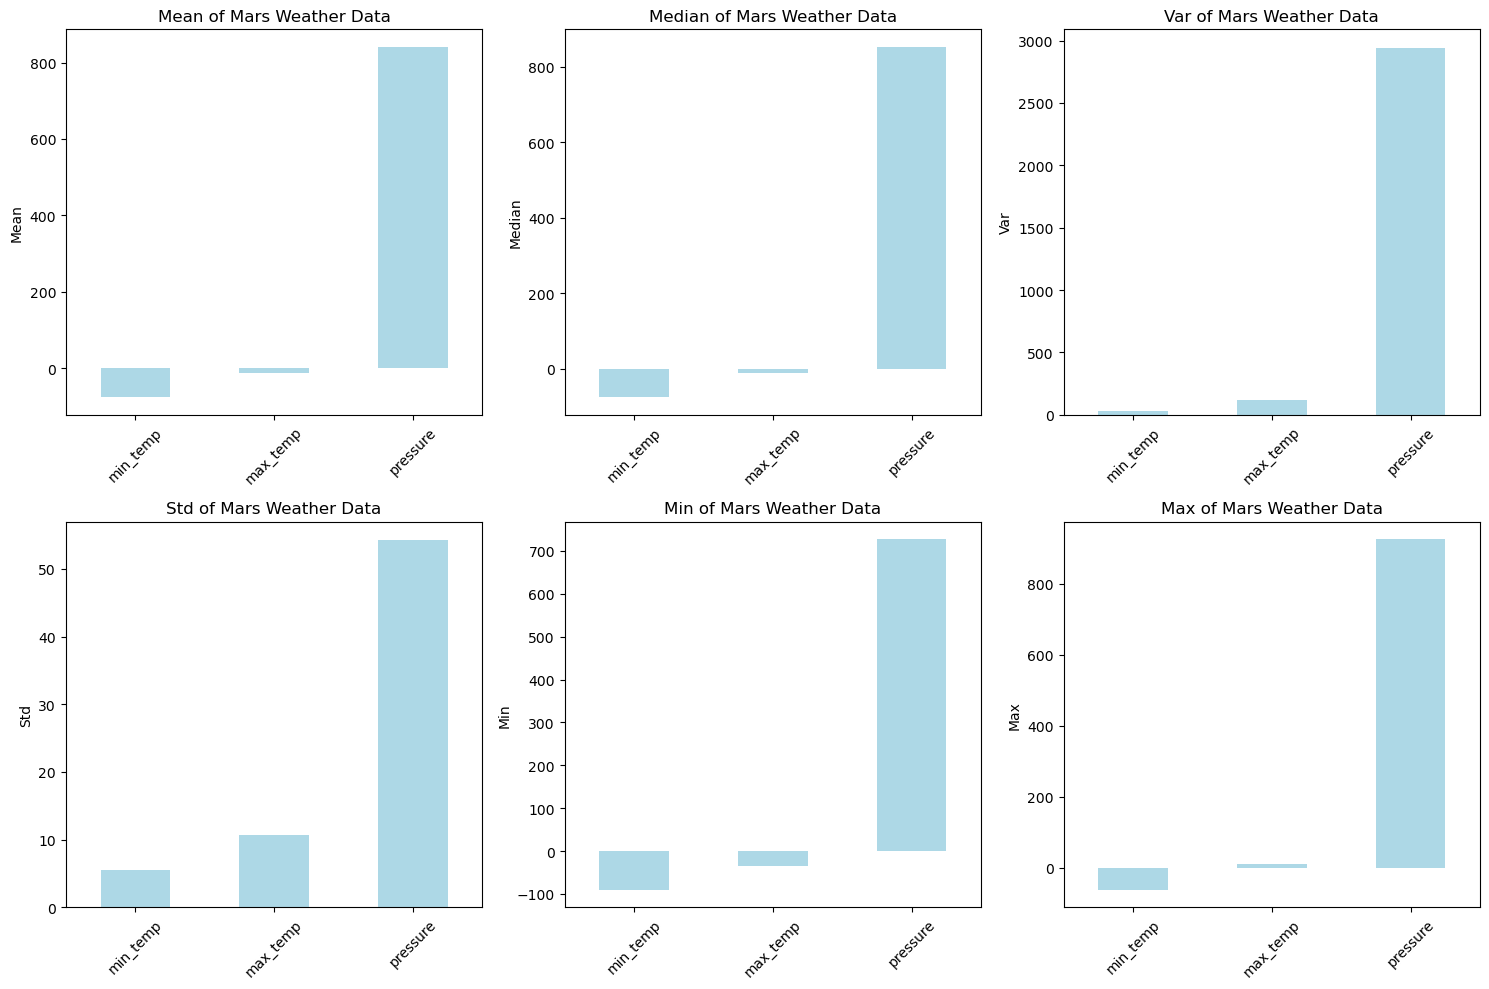

In [857]:
# Create a 2x3 grid of plots

plt.figure(figsize=(15, 10))

for i, stat in enumerate(stats, 1):
    plt.subplot(2, 3, i)  
    summary_statistics_transposed[stat].plot(kind="bar", color="lightblue")
    plt.title(f"{stat.capitalize()} of Mars Weather Data")
    plt.ylabel(stat.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

- **Pressure fluctuations**: The pressure on Mars shows significant variability, which might be influenced by factors like Martian seasons, dust storms, or topographical differences.
- **Temperature stability**: Despite the extremely low temperatures, the variance and standard deviation suggest that Martian temperatures are relatively stable, with less dramatic fluctuations compared to pressure.
- **Extreme conditions**: The dataset underscores the extreme environmental conditions on Mars, with low temperatures and a thin but variable atmosphere.

These insights can help researchers understand the daily and seasonal weather patterns on Mars, which are crucial for future missions and potentially establishing human presence on the planet.

In [861]:
# Calculate the temperature range as the difference between max_temp and min_temp

mars_weather_git_cleaned["temperature_range"] = mars_weather_git_cleaned["max_temp"] - mars_weather_git_cleaned["min_temp"]

/var/folders/nr/w2b2xpqj79q40hh6j8sw7glw0000gn/T/ipykernel_96185/887369889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_weather_git_cleaned["temperature_range"] = mars_weather_git_cleaned["max_temp"] - mars_weather_git_cleaned["min_temp"]


In [865]:
mars_weather_git_cleaned["temperature_range"].value_counts()

temperature_range
63.0    107
65.0    102
64.0    100
60.0     93
62.0     90
66.0     89
68.0     89
59.0     88
67.0     87
58.0     85
56.0     82
70.0     81
57.0     79
61.0     74
69.0     73
71.0     63
55.0     54
72.0     52
54.0     49
73.0     45
53.0     41
74.0     37
76.0     30
52.0     29
75.0     27
51.0     24
77.0     20
50.0     18
78.0     15
49.0     12
80.0      9
79.0      9
48.0      3
81.0      3
82.0      2
84.0      2
45.0      1
46.0      1
47.0      1
85.0      1
Name: count, dtype: int64

In [869]:
# Group by sol (Martian day) to analyze temperature range over time

temperature_range_over_time = mars_weather_git_cleaned[["sol", "temperature_range"]].groupby("sol").mean()

In [873]:
temperature_range_over_time.value_counts()

temperature_range
63.0                 107
65.0                 102
64.0                 100
60.0                  93
62.0                  90
68.0                  89
66.0                  89
59.0                  88
67.0                  87
58.0                  85
56.0                  82
70.0                  81
57.0                  79
61.0                  74
69.0                  73
71.0                  63
55.0                  54
72.0                  52
54.0                  49
73.0                  45
53.0                  41
74.0                  37
76.0                  30
52.0                  29
75.0                  27
51.0                  24
77.0                  20
50.0                  18
78.0                  15
49.0                  12
79.0                   9
80.0                   9
48.0                   3
81.0                   3
82.0                   2
84.0                   2
45.0                   1
46.0                   1
47.0                   1
85.0   

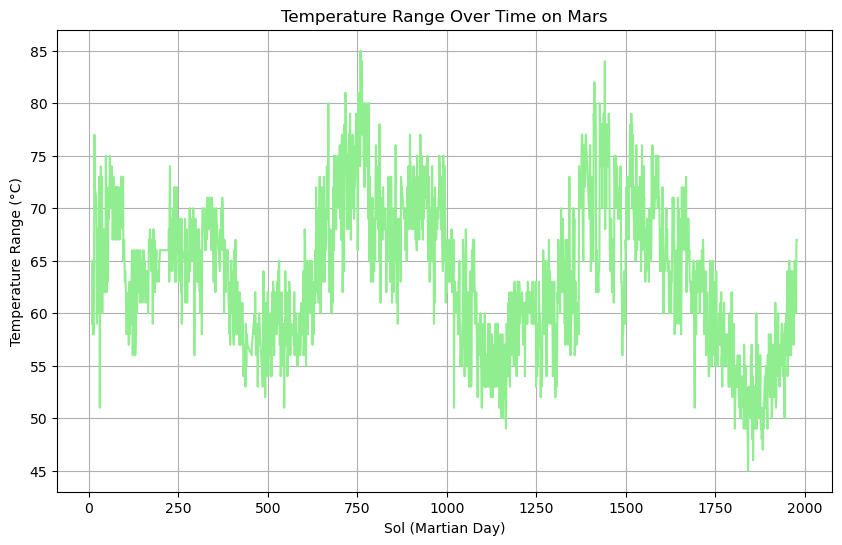

In [881]:
# Plot the temperature range over time
    
plt.figure(figsize=(10, 6))
plt.plot(temperature_range_over_time.index, temperature_range_over_time["temperature_range"], color="lightgreen")
plt.title("Temperature Range Over Time on Mars")
plt.xlabel("Sol (Martian Day)")
plt.ylabel("Temperature Range (°C)")
plt.grid(True)
plt.show()

* The temperature range (difference between maximum and minimum temperatures) on Mars varies significantly over time.
* There are noticeable patterns of periodic increases and decreases in the temperature range, which might suggest seasonal variations or other cyclic environmental changes on Mars.

#### Time series analysis
* How weather variables such as min_temp, max_temp and pressure change over time. 
* How weather conditions vary with seasons.
* How the day length varies over time.

In [887]:
# Set the "terrestrial_date" as the index

mars_weather_git_cleaned.set_index("terrestrial_date", inplace=True)

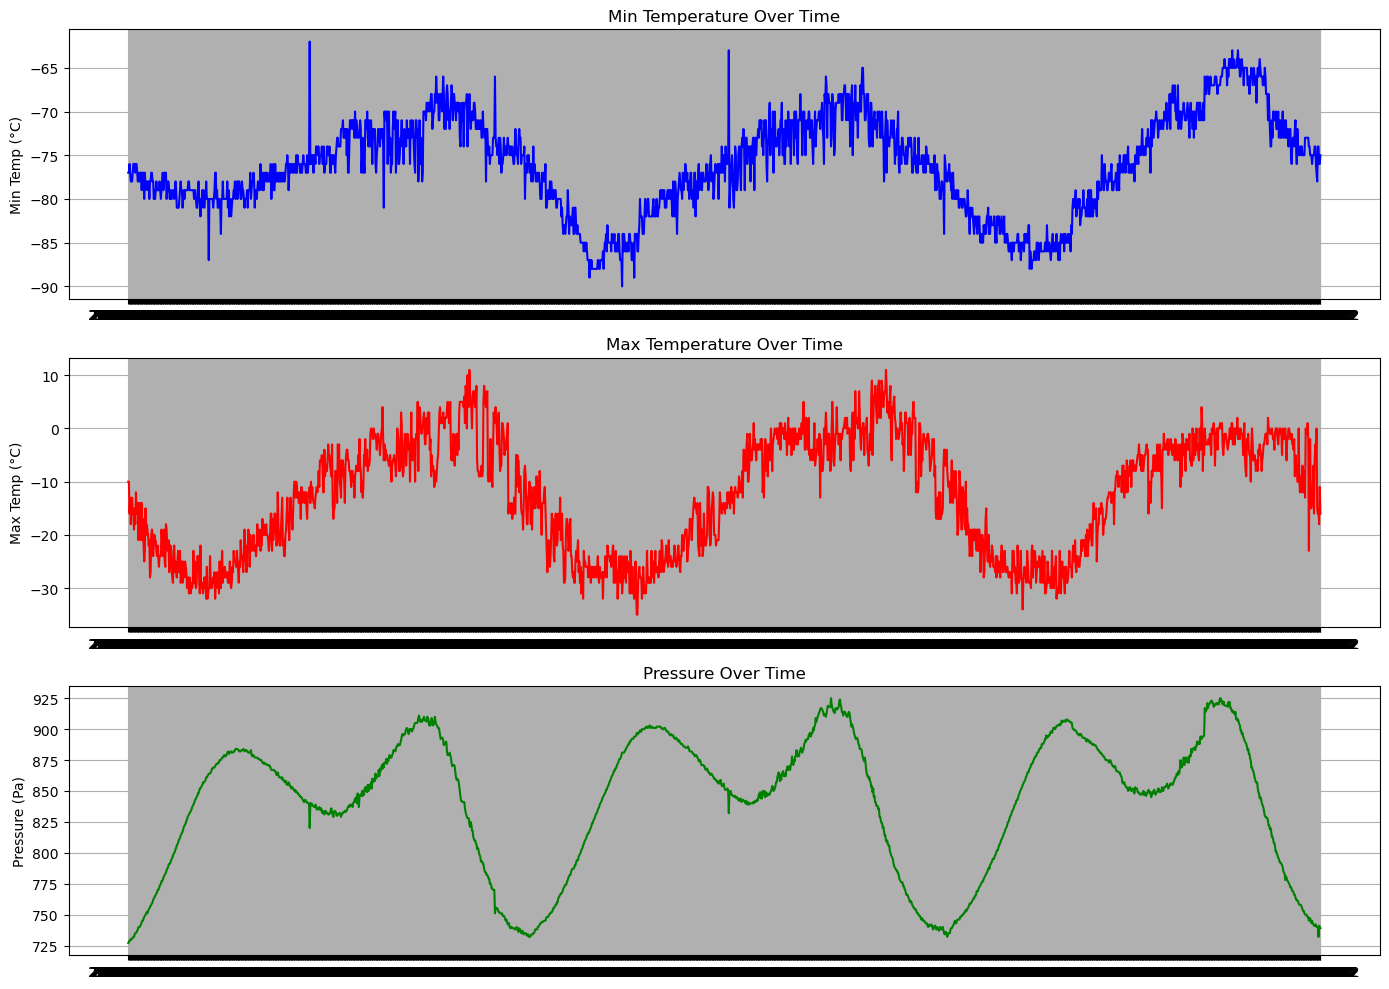

In [889]:
# Plotting the trends over time

plt.figure(figsize=(14, 10))

# Subplot for min_temp

plt.subplot(3, 1, 1)
plt.plot(mars_weather_git_cleaned.index, mars_weather_git_cleaned["min_temp"], color="blue", label="Min Temp (°C)")
plt.title("Min Temperature Over Time")
plt.ylabel("Min Temp (°C)")
plt.grid(True)

# Subplot for max_temp

plt.subplot(3, 1, 2)
plt.plot(mars_weather_git_cleaned.index, mars_weather_git_cleaned["max_temp"], color="red", label="Max Temp (°C)")
plt.title("Max Temperature Over Time")
plt.ylabel("Max Temp (°C)")
plt.grid(True)

# Subplot for pressure

plt.subplot(3, 1, 3)
plt.plot(mars_weather_git_cleaned.index, mars_weather_git_cleaned["pressure"], color="green", label="Pressure (Pa)")
plt.title("Pressure Over Time")
plt.ylabel("Pressure (Pa)")
plt.grid(True)

plt.tight_layout()
plt.show()

- **Seasonal cycles**: The analysis of Martian weather data reveals strong seasonal cycles in all three variables: minimum temperature, maximum temperature, and atmospheric pressure. These cycles suggest that the weather on Mars is significantly influenced by its orbit around the Sun, resulting in distinct periods of colder and warmer temperatures, as well as fluctuating atmospheric pressure.

- **Temperature fluctuations**: Both the minimum and maximum temperatures show clear patterns of fluctuation. The minimum temperatures drop to as low as -90°C during the colder periods, while the maximum temperatures can rise slightly above 0°C during the warmer periods. These fluctuations are critical to understanding the extreme weather conditions that any mission to Mars would need to endure.

- **Pressure variability**: The atmospheric pressure on Mars also follows a cyclical pattern, ranging from approximately 725 Pa to 925 Pa. This variability is likely tied to the expansion and contraction of the Martian atmosphere in response to seasonal temperature changes. Understanding this variability is crucial for planning activities that depend on stable atmospheric conditions, such as landing spacecraft and maintaining habitats.

- **Implications for Mars missions**: The insights gained from this analysis are essential for future Mars missions. Understanding the timing and extent of seasonal changes can help in planning landings, surface operations, and potentially setting up temporary shelters or habitats. Knowing when temperatures and pressures are more stable or extreme will be critical for ensuring the safety and success of missions to the Red Planet.

#### Correlation analysis
* Correlation between different weather variables, such as temperature and pressure.

In [895]:
columns_of_interest = ["min_temp", "max_temp", "pressure"]

In [897]:
# Calculate the correlation matrix

correlation_matrix = mars_weather_git_cleaned[columns_of_interest].corr()

In [899]:
correlation_matrix

,min_temp,max_temp,pressure
min_temp,1.000000,0.822799,0.153240
max_temp,0.822799,1.000000,-0.007817
pressure,0.153240,-0.007817,1.000000


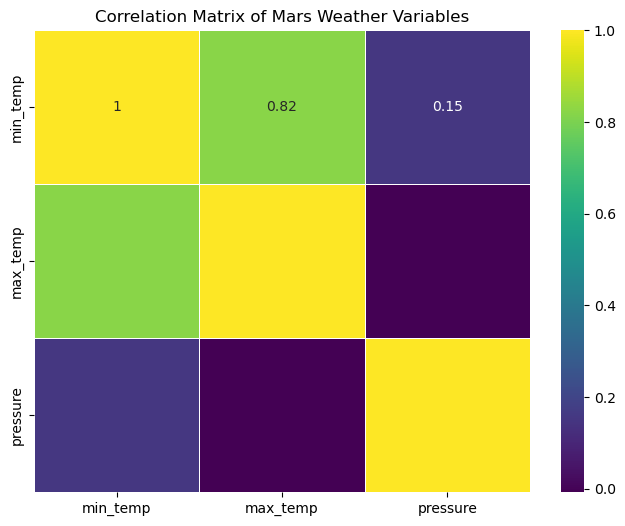

In [901]:
# Plotting the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation Matrix of Mars Weather Variables")
plt.show()

1. **Min temperature (min_temp) and Max temperature (max_temp)**
   - **Correlation coefficient: 0.82**
   <br>There is a strong positive correlation between the minimum and maximum temperatures. This indicates that when the minimum temperature is higher, the maximum temperature tends to be higher as well. This strong relationship suggests that both temperatures are influenced by similar factors, such as the Martian season or daily solar radiation patterns.

2. **Min temperature (min_temp) and Pressure**
   - **Correlation coefficient: 0.15**
   <br>The weak positive correlation between minimum temperature and pressure suggests a slight tendency for pressure to increase as minimum temperature rises. However, the relationship is not strong, indicating that pressure on Mars is influenced by other factors or that the temperature-pressure relationship is more complex.

3. **Max temperature (max_temp) and Pressure**
   - **Correlation coefficient: -0.01**
   <br>The near-zero correlation between maximum temperature and pressure suggests there is virtually no linear relationship between these two variables. This implies that changes in the maximum temperature do not have a significant impact on atmospheric pressure, and vice versa.

**Summary**
- **Temperature correlation**: The strong correlation between `min_temp` and `max_temp` is expected, as both are closely linked to the daily and seasonal thermal dynamics on Mars.
- **Temperature and pressure correlation**: The weak correlations between temperature (both min and max) and pressure suggest that temperature changes are not strongly driven by or driving pressure changes on Mars. This could be due to Mars' thin atmosphere, where other factors, such as altitude, might play a more significant role in pressure variations.

#### Event analysis
* Identify any days with extreme weather conditions that might indicate dust storms or other significant weather events.


In [915]:
# Thresholds for extreme conditions

extreme_min_temp = mars_weather_git_cleaned["min_temp"].quantile(0.05)  
extreme_max_temp = mars_weather_git_cleaned["max_temp"].quantile(0.95)  
extreme_pressure = mars_weather_git_cleaned["pressure"].quantile(0.05)  

In [917]:
# Filter for extreme weather conditions

extreme_weather_days = mars_weather_git_cleaned[
    (mars_weather_git_cleaned["min_temp"] <= extreme_min_temp) |
    (mars_weather_git_cleaned["max_temp"] >= extreme_max_temp) |
    (mars_weather_git_cleaned["pressure"] <= extreme_pressure)
]

In [919]:
# Display the extreme weather days

extreme_weather_days_sorted = extreme_weather_days.sort_values(by="terrestrial_date")
extreme_weather_days_sorted[["min_temp", "max_temp", "pressure"]].value_counts()

min_temp  max_temp  pressure
-78.0     -15.0     740.0       2
          -14.0     738.0       2
-74.0     -16.0     740.0       2
-76.0     -15.0     734.0       2
-75.0     -16.0     739.0       2
                               ..
-79.0     -17.0     738.0       1
          -15.0     740.0       1
          -10.0     739.0       1
          -7.0      737.0       1
-66.0      3.0      910.0       1
Name: count, Length: 289, dtype: int64

<br>**After identifying the days with extreme weather conditions, we can analyze them further:**

- **Temperature anomalies:** Extremely low or high temperatures could indicate abnormal Martian weather events.
- **Pressure anomalies:** Sudden drops or spikes in atmospheric pressure might also indicate significant weather events.

## 4. Predictive modeling
* **Temperature prediction:** A model to predict future temperatures on Mars.

In [128]:
mars_weather_git_cleaned

,id,sol_number,ls,min_temp,max_temp,pressure,atmo_opacity,month_number,temperature_range
terrestrial_date,,,,,,,,,
27.02.2018,1895,1977,135,-77.0,-10.0,727.0,Sunny,5,67.0
26.02.2018,1893,1976,135,-77.0,-10.0,728.0,Sunny,5,67.0
25.02.2018,1894,1975,134,-76.0,-16.0,729.0,Sunny,5,60.0
24.02.2018,1892,1974,134,-77.0,-13.0,729.0,Sunny,5,64.0
23.02.2018,1889,1973,133,-78.0,-18.0,730.0,Sunny,5,60.0
...,...,...,...,...,...,...,...,...,...
20.08.2012,46,14,157,-74.0,-16.0,740.0,Sunny,6,58.0
19.08.2012,35,13,157,-74.0,-15.0,732.0,Sunny,6,59.0
18.08.2012,24,12,156,-76.0,-18.0,741.0,Sunny,6,58.0


In [925]:
# Selecting the feature (sol) and target (min_temp or max_temp)

X = mars_weather_git_cleaned[["sol"]]
y = mars_weather_git_cleaned["min_temp"]

In [927]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [929]:
# Create the linear regression model

model = LinearRegression()

In [931]:
# Train the model

model.fit(X_train, y_train)

LinearRegression()

In [933]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [935]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred).round(2)
r2 = r2_score(y_test, y_pred).round(2)

In [937]:
mse

26.37

**Interpretation:** The Mean Squared Error (MSE) represents the average of the squared differences between the actual temperature values and the predicted temperature values. An MSE of 26.37 means that, on average, the squared difference between the predicted and actual temperature values is 26.37 degrees Celsius squared.

In [941]:
r2

0.01

**Interpretation:**
The R-squared score indicates the proportion of the variance in the dependent variable (in this case, temperature) that is predictable from the independent variable(s) (e.g., sol or Martian day). An R-squared value of 0.01 suggests that the model explains only about 1% of the variance in the temperature data. This is a very low R-squared value, indicating that the model is not a good fit for the data and that the sol (Martian day) does not strongly predict the temperature.

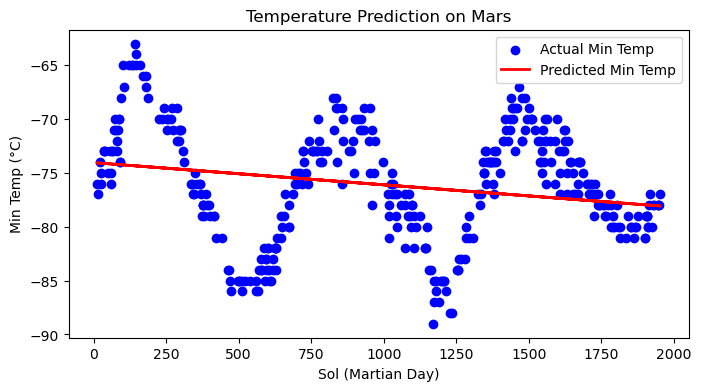

In [943]:
# Plotting the results

plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color="blue", label="Actual Min Temp")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Min Temp")
plt.title("Temperature Prediction on Mars")
plt.xlabel("Sol (Martian Day)")
plt.ylabel("Min Temp (°C)")
plt.legend()
plt.show()

* **High MSE:** The MSE of 26.37 suggests that the predictions are not very close to the actual temperature values, indicating that the model's predictions are quite off on average.
* **Low R-squared:** The R-squared value of 0.01 suggests that the model does not explain much of the variation in the temperature data. This implies that the chosen feature (sol or Martian day) is not a strong predictor of temperature by itself.

* **Neural Networks predicting model**
<br><br>
**Please note that since the initial weights of the neurons are random, different starting points can lead to different paths during training, which can result in slightly different models each time you train, even if all other parameters are the same!** 

In [1093]:
# Selecting features and target

X = mars_weather_git_cleaned[["sol", "pressure"]]
y = mars_weather_git_cleaned["min_temp"]

In [1095]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1097]:
# Standardize the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1099]:
# Build the neural network model

model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1101]:
# Compile the model

model.compile(optimizer="adam", loss="mse")

In [1103]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5739.3252 - val_loss: 5693.9927
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 5590.6357 - val_loss: 5304.4590
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 5090.3638 - val_loss: 4429.9941
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 4026.7339 - val_loss: 2972.9502
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 2511.0613 - val_loss: 1391.2352
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 1044.2019 - val_loss: 450.4861
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 337.0306 - val_loss: 203.1076
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 169.4358 - val_loss: 170.9814
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 152.5041 - val_loss: 158.4992
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 133.7640 - val_loss: 147.1226
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 132.9960 - val_los

In [1105]:
# Make predictions on the test set

y_pred_nn = model.predict(X_test_scaled)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [1107]:
# Evaluate the model

mse_nn = mean_squared_error(y_test, y_pred_nn).round(2)
r2_nn = r2_score(y_test, y_pred_nn).round(2)

In [1109]:
mse_nn

14.69

In [1111]:
r2_nn

0.45

* **Improved accuracy:** The lower MSE of 14.69 indicates that the neural network model is more accurate in predicting the minimum temperatures on Mars compared to the simpler linear regression models.
* **Better fit:** The R² score of 0.45 suggests that the neural network model is able to explain 45% of the variance in the temperature data. This is a significant improvement over the linear models, which had very low R² scores, indicating that they explained very little of the variance in the data.
* **Non-Linear relationships:** The improved performance of the neural network suggests that the relationship between the Martian day, atmospheric pressure, and minimum temperature is non-linear. The neural network, with its ability to model complex relationships, is better suited to capture these patterns but it is still not good enough for predicting.

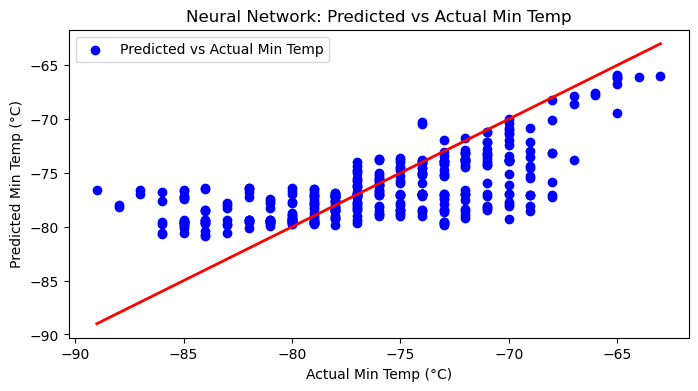

In [1118]:
# Plotting the results

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_nn, color="blue", label="Predicted vs Actual Min Temp")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title("Neural Network: Predicted vs Actual Min Temp")
plt.xlabel("Actual Min Temp (°C)")
plt.ylabel("Predicted Min Temp (°C)")
plt.legend()
plt.show()

<br>
This plot serves as a visual representation of the neural network model’s predictions compared to the actual data. While the model has made some accurate predictions (points near the red line), there are still significant errors that indicate the model could be further refined to improve its predictive performance.

## 5. Working with images which are consistent with our study
* In this chapter we will explore some images from Mars to determine whether they are consistent with our study so far. 

In [44]:
# Since the size of the images were so big and cannot upload it, I took only the first 300 images in a separate file
# mars_images = np.load("non_captioned_thumbnails.npy")

In [46]:
# mars_images.shape

(72423, 100, 150)

In [112]:
# Here is where I get the first 300 images and continued to work with this sample 

# part_mars_images = mars_images[:300, :, :]

In [50]:
# np.save("part_mars_images.npy", np.array(part_mars_images))

In [46]:
part_mars_images = np.load("part_mars_images.npy")

In [48]:
part_mars_images

array([[[0.634 , 0.767 , 0.736 , ..., 0.612 , 0.6953, 0.7754],
        [0.618 , 0.767 , 0.749 , ..., 0.6196, 0.7085, 0.626 ],
        [0.7124, 0.7754, 0.7607, ..., 0.643 , 0.7085, 0.693 ],
        ...,
        [0.5527, 0.633 , 0.558 , ..., 0.6587, 0.541 , 0.795 ],
        [0.5933, 0.651 , 0.6196, ..., 0.7427, 0.732 , 0.7544],
        [0.5854, 0.682 , 0.7607, ..., 0.639 , 0.7007, 0.6562]],

       [[0.706 , 0.682 , 0.63  , ..., 0.5674, 0.579 , 0.558 ],
        [0.6904, 0.6562, 0.6064, ..., 0.558 , 0.5674, 0.5635],
        [0.6914, 0.682 , 0.6523, ..., 0.541 , 0.5674, 0.5527],
        ...,
        [0.1686, 0.2432, 0.2588, ..., 0.83  , 0.865 , 0.9097],
        [0.2496, 0.2457, 0.2301, ..., 0.796 , 0.792 , 0.8315],
        [0.2615, 0.2783, 0.2432, ..., 0.788 , 0.7817, 0.7974]],

       [[0.536 , 0.4888, 0.566 , ..., 0.7163, 0.783 , 0.762 ],
        [0.4563, 0.4875, 0.5596, ..., 0.6797, 0.7295, 0.749 ],
        [0.272 , 0.272 , 0.5215, ..., 0.5767, 0.6904, 0.699 ],
        ...,
        [0.5

In [50]:
# Convert to DataFrame

flat_images = part_mars_images.reshape(part_mars_images.shape[0], -1)

In [52]:
flat_images

array([[0.634 , 0.767 , 0.736 , ..., 0.639 , 0.7007, 0.6562],
       [0.706 , 0.682 , 0.63  , ..., 0.788 , 0.7817, 0.7974],
       [0.536 , 0.4888, 0.566 , ..., 0.63  , 0.6616, 0.72  ],
       ...,
       [0.762 , 0.7583, 0.7476, ..., 0.629 , 0.6235, 0.7124],
       [0.421 , 0.4653, 0.4536, ..., 0.933 , 0.9346, 0.9463],
       [0.366 , 0.3516, 0.366 , ..., 0.689 , 0.697 , 0.6196]],
      dtype=float16)

In [54]:
# Create a DataFrame with flat images

mars_images_data = pd.DataFrame(flat_images)

In [56]:
mars_images_data

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,0.633789,0.767090,0.735840,0.712402,0.752930,0.698242,0.681152,0.704590,0.674316,0.688965,...,0.706055,0.516113,0.700684,0.639160,0.650879,0.704590,0.710938,0.639160,0.700684,0.656250
1,0.706055,0.682129,0.629883,0.596191,0.665527,0.690430,0.682129,0.671875,0.704590,0.725586,...,0.811523,0.826172,0.856445,0.835449,0.830078,0.820801,0.809082,0.788086,0.781738,0.797363
2,0.536133,0.488770,0.565918,0.827637,0.843262,0.794922,0.827637,0.772461,0.576660,0.457520,...,0.606445,0.342529,0.287598,0.556641,0.304688,0.544922,0.798828,0.629883,0.661621,0.720215
3,0.023529,0.023529,0.023529,0.023529,0.023529,0.022217,0.023529,0.035309,0.045746,0.045746,...,0.045746,0.044434,0.040527,0.040527,0.036591,0.036591,0.041840,0.040527,0.040527,0.033997
4,0.206543,0.224854,0.189575,0.166016,0.241821,0.214355,0.304688,0.365967,0.426025,0.254883,...,0.521484,0.572754,0.558105,0.596191,0.604004,0.650879,0.643066,0.609375,0.596191,0.521484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.650879,0.385742,0.547852,0.696777,0.598633,0.749023,0.666504,0.775391,0.629883,0.381592,...,0.752930,0.532227,0.369873,0.492920,0.637695,0.478516,0.611816,0.568848,0.628906,0.290283
296,0.299316,0.325439,0.305908,0.399902,0.333252,0.450928,0.392090,0.329346,0.415771,0.384277,...,0.541016,0.658691,0.426025,0.328125,0.677246,0.484863,0.530762,0.365967,0.469238,0.560547
297,0.762207,0.758301,0.747559,0.670410,0.533203,0.453613,0.480957,0.505859,0.454834,0.355469,...,0.509766,0.474609,0.449707,0.571289,0.519043,0.615723,0.656250,0.628906,0.623535,0.712402
298,0.420898,0.465332,0.453613,0.434082,0.410400,0.397461,0.389648,0.371338,0.354248,0.341064,...,0.875977,0.868164,0.882324,0.897949,0.909668,0.913574,0.933105,0.933105,0.934570,0.946289


In [58]:
flat_images.shape

(300, 15000)

In [60]:
part_mars_images.shape

(300, 100, 150)

* Here is an example for training AI models to detect and classify surface features on Mars, such as Water Ice, Lack of Dust, and Frost Heaving using flat images:

In [62]:
# Generating random labels for demonstration

y = np.array(["Water_Ice", "Lack of Dust", "Frost Heaving"] * (flat_images.shape[0] // 3))

In [64]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [66]:
# Number of images for sample

sample_size = 100

In [68]:
# Randomly select 100 indices from the dataset

indices = np.random.choice(flat_images.shape[0], sample_size, replace=False)

In [70]:
# Create the sample dataset

X_sample = flat_images[indices]
y_sample = y_encoded[indices]

In [72]:
# Split the sample into training and testing sets

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [74]:
# Initialize the Random Forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
# Train the model on the sampled training data

model.fit(X_train_sample, y_train_sample)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions on the sampled test set

y_pred_sample = model.predict(X_test_sample)

In [80]:
# Evaluate the model

accuracy = accuracy_score(y_test_sample, y_pred_sample)

In [82]:
print(f"Sampled Accuracy: {accuracy * 100:.2f}%")
print("\nSampled Classification Report:\n", classification_report(y_test_sample, y_pred_sample))

Sampled Accuracy: 36.67%

Sampled Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.56      0.42         9
           1       0.45      0.38      0.42        13
           2       0.25      0.12      0.17         8

    accuracy                           0.37        30
   macro avg       0.35      0.36      0.33        30
weighted avg       0.36      0.37      0.35        30



* **Sampled accuracy:**
<br>
The model correctly classified approximately 36.67% of the samples. This is below what would be considered a good model performance, especially for a three-class problem.

* **Precision:**
<br>
**Class 0 (0.33):** Precision here indicates that when the model predicts class 0, it’s correct 33% of the time.<br>
**Class 1 (0.45):** Predictions for class 1 are correct 45% of the time.<br>
**Class 2 (0.25):** Predictions for class 2 are correct 25% of the time.
<br>
* **Recall**
<br>
**Class 0 (0.56):** The model correctly identified 56% of all true instances of class 0.<br>
**Class 1 (0.38):** The model correctly identified 38% of all true instances of class 1.<br>
**Class 2 (0.12):** The model correctly identified 12% of all true instances of class 2.<br>
* **F1-Score:**
<br>
**The F1-score is a balance between precision and recall.**<br>
**Class 0 (0.42):** The harmonic mean of precision and recall, providing a balance between the two.<br>
**Class 1 (0.42):** The balance between precision and recall.<br>
**Class 2 (0.17):** This lower score indicates that the model struggles significantly with this class.<br>
* **Support:**
<br>
**Class 0 (9):** There are 9 instances of class 0 in the test set.<br>
**Class 1 (13):** There are 12 instances of class 1 in the test set.<br>
**Class 2 (8):** There are 8 instances of class 2 in the test set.

In [86]:
# Update the visualization function for RGB images

def show_rgb_image(image_array):
    plt.imshow(image_array, cmap = "Reds_r")  
    plt.axis("off")
    plt.show()

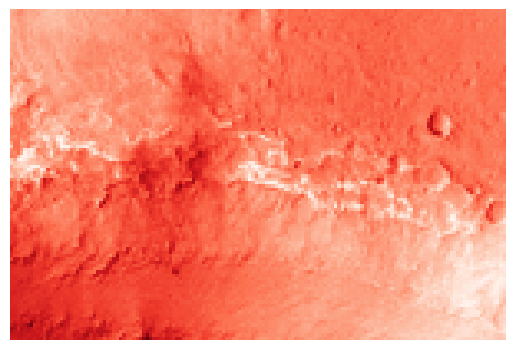

In [90]:
# Display the first image in the NumPy array

show_rgb_image(part_mars_images[1])

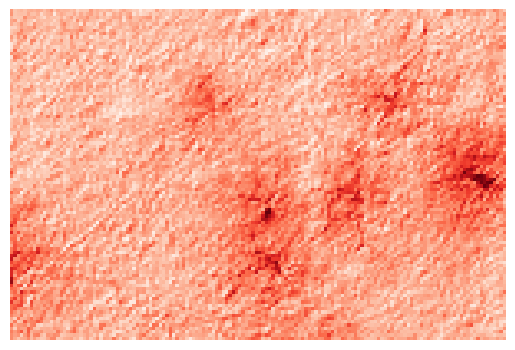

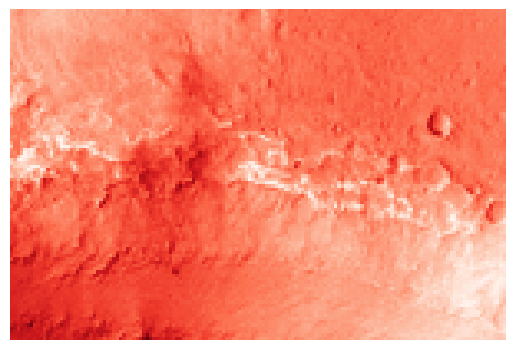

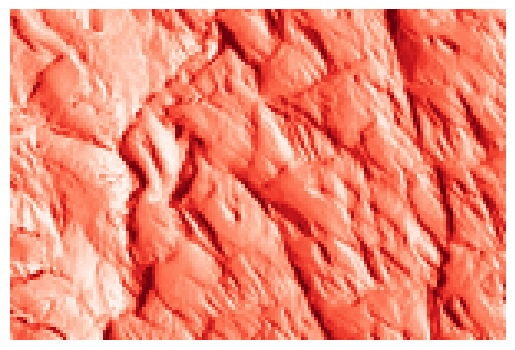

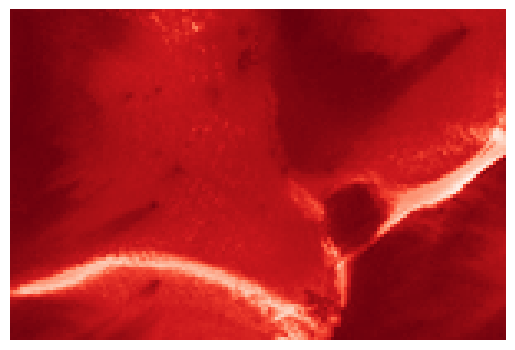

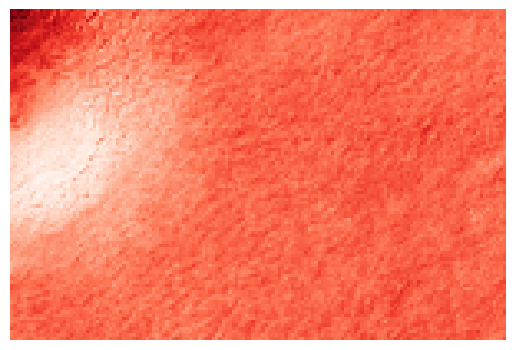

In [92]:
for i in range(5):
    show_rgb_image(part_mars_images[i])

**Surface texture:** The rough, textured appearance of the Martian surface in these images could be consistent with regions where frost has sublimated or areas exposed to extreme cold, leading to cracking or frost heaving. However, this is not definitive without more context.

**Lack of dust storms:** In contrast, if these images were taken during a period when Mars typically experiences global dust storms but show a clear surface instead, this could suggest a temporary high-pressure system. Again, without additional data, this is not conclusive.

**Conclusion:**
Visual Indicators alone are insufficient: The images themselves suggest conditions that could be associated with cold weather, such as surface texture possibly linked to frost or ice. However, they do not provide direct evidence of high pressure.
To make a robust conclusion, these images should be analyzed in conjunction with temperature and pressure data from Mars (which we have already done). This combined approach would offer a stronger case for the hypothesis of extremely low temperatures and high pressure.

* **Resize images**

In [94]:
def resize_image(image_array, new_width, new_height):
 
    image_array = (image_array * 255).astype(np.uint8)
    
    image_pil = Image.fromarray(image_array)
    
    resized_image = image_pil.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    return np.array(resized_image)

In [96]:
# New dimensions for the images

new_width = 128
new_height = 128

In [98]:
resized_images = np.array([resize_image(image, new_width, new_height) for image in part_mars_images])

In [100]:
# Output (128, 128) for grayscale or (128, 128, 3) for RGB images

print(resized_images[0].shape)

(128, 128)


In [102]:
for i, image in enumerate(resized_images):
    image_pil = Image.fromarray(image)

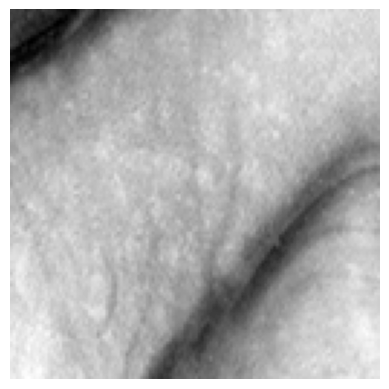

In [104]:
# Resized first image

plt.imshow(resized_images[100], cmap="gray")
plt.axis("off")
plt.show()

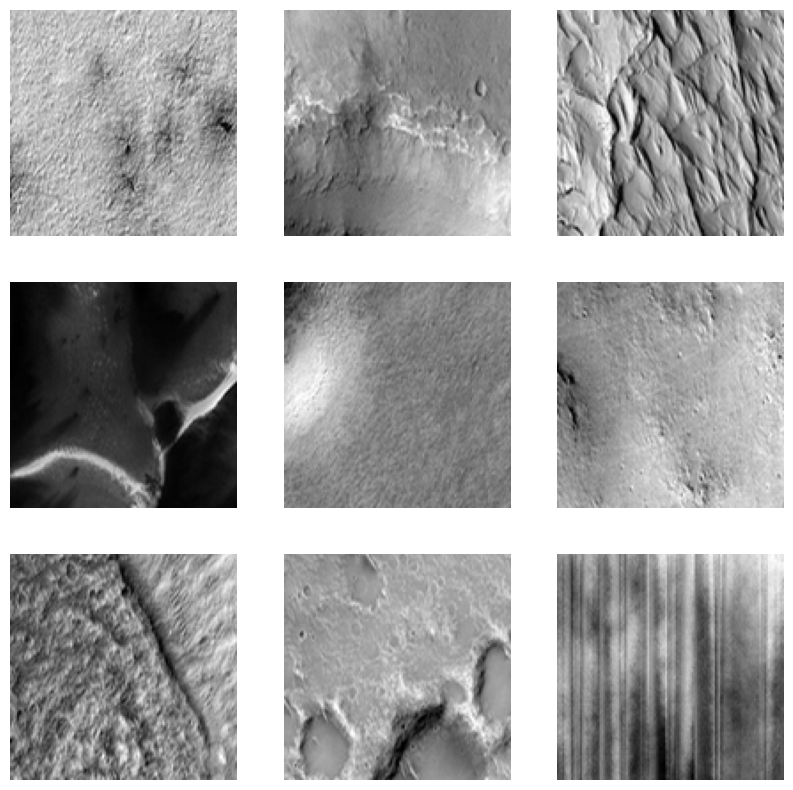

In [106]:
# Number of images to display

num_images = 9
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)  
    plt.imshow(resized_images[i], cmap="gray")  
    plt.axis("off") 

plt.show()

In [108]:
# Save the resized images back to a .npy file

np.save("resized_mars_images.npy", np.array(resized_images))

#### Overall conclusion:
The Mars weather data and analyses provide a foundational understanding of the planet's environmental conditions. While there is clear evidence of extreme temperatures and varying atmospheric pressures, the complex interactions between these variables require further study. The insights gained from this analysis are crucial for the planning of future missions to Mars, particularly in preparing for the harsh and unpredictable weather conditions that may be encountered.